In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import sweetviz as sv
sns.set()

In [2]:
from IPython.display import clear_output

In [23]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'DataError' from 'pandas.core.base' (c:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\base.py)

In [8]:
df = pd.read_csv("C:\\Users\\eduar\\OneDrive\\Documentos\\Henry\\primer proyecto individual\\proyecto cohrte 10\\archivo.csv")

C:\Users\eduar\AppData\Local\Temp\ipykernel_12368\2085546587.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\eduar\\OneDrive\\Documentos\\Henry\\primer proyecto individual\\proyecto cohrte 10\\archivo.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   budget                               45376 non-null  float64
 1   id_belongs_to_collection             45379 non-null  object 
 2   original_language                    45368 non-null  object 
 3   overview                             44438 non-null  object 
 4   popularity                           45377 non-null  object 
 5   release_date                         45376 non-null  object 
 6   revenue                              45379 non-null  float64
 7   runtime                              45130 non-null  float64
 8   status                               45296 non-null  object 
 9   tagline                              20398 non-null  object 
 10  title                                45376 non-null  object 
 11  vote_average                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   budget                               45376 non-null  float64
 1   id_belongs_to_collection             45379 non-null  object 
 2   original_language                    45368 non-null  object 
 3   overview                             44438 non-null  object 
 4   popularity                           45377 non-null  object 
 5   release_date                         45376 non-null  object 
 6   revenue                              45379 non-null  float64
 7   runtime                              45130 non-null  float64
 8   spoken_languages                     45376 non-null  object 
 9   status                               45296 non-null  object 
 10  tagline                              20398 non-null  object 
 11  title                                45376 non-null  object 
 12  vote_average                         45376 non-null  float64
 13  id_belongs_to_collection.1           4488 non-null   float64
 14  name_belongs_to_collection           4488 non-null   object 
 15  backdrop_path_belongs_to_collection  3260 non-null   object 
 16  0                                    3 non-null      float64
 17  production_company_name              45379 non-null  object 
 18  production_company_id                45379 non-null  object 
 19  production_countries_name            45379 non-null  object 
 20  production_countries_id              45379 non-null  object 
 21  genres_name                          45379 non-null  object 
 22  genres_id                            45379 non-null  object 
 23  release_year                         45376 non-null  float64
 24  return                               45379 non-null  float64
dtypes: float64(8), object(17)
memory usage: 8.7+ MB


In [10]:
valores_nulos_por_columna = df.isnull().sum()
valores_nulos_por_columna

budget                                     3
id_belongs_to_collection                   0
original_language                         11
overview                                 941
popularity                                 2
release_date                               3
revenue                                    0
runtime                                  249
status                                    83
tagline                                24981
title                                      3
vote_average                               3
id_belongs_to_collection.1             40891
name_belongs_to_collection             40891
backdrop_path_belongs_to_collection    42119
0                                      45376
production_company_name                    0
production_company_id                      0
production_countries_name                  0
production_countries_id                    0
genres_name                                0
genres_id                                  0
spoken_lan

budget                                     3
id_belongs_to_collection                   0
original_language                         11
overview                                 941
popularity                                 2
release_date                               3
revenue                                    0
runtime                                  249
spoken_languages                           3
status                                    83
tagline                                24981
title                                      3
vote_average                               3
id_belongs_to_collection.1             40891
name_belongs_to_collection             40891
backdrop_path_belongs_to_collection    42119
0                                      45376
production_company_name                    0
production_company_id                      0
production_countries_name                  0
production_countries_id                    0
genres_name                                0
genres_id                                  0
release_year                               3
return                                     0
dtype: int64

In [ ]:
df.head(3)

revisar si existen uotlider

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns

In [15]:
outliers = pd.DataFrame()
for column in numeric_columns:
    data = df[column]
    mean = np.mean(data)
    std = np.std(data)
    threshold = 2.5  # se podria ir ajustado, según tus necesidades
    is_outlier = (data < mean - threshold * std) | (data > mean + threshold * std)
    column_outliers = pd.DataFrame({column: data[is_outlier]})
    outliers = pd.concat([outliers, column_outliers], axis=1)

In [16]:
print(outliers)

           budget      revenue  runtime  vote_average  \
1      65000000.0  262797249.0      NaN           NaN   
5      60000000.0  187436818.0      NaN           NaN   
6      58000000.0          NaN      NaN           NaN   
9      58000000.0  352194034.0      NaN           NaN   
10     62000000.0          NaN      NaN           NaN   
...           ...          ...      ...           ...   
45360         NaN          NaN      NaN           NaN   
45361         NaN          NaN      NaN           NaN   
45362         NaN          NaN      NaN           NaN   
45364         NaN          NaN      NaN           NaN   
45365         NaN          NaN      NaN           NaN   

       id_belongs_to_collection.1   0  release_year  return  
1                             NaN NaN           NaN     NaN  
5                             NaN NaN           NaN     NaN  
6                             NaN NaN           NaN     NaN  
9                             NaN NaN           NaN     NaN  
10   

         budget      revenue  runtime  vote_average  \
1      65000000.0  262797249.0      NaN           NaN   
5      60000000.0  187436818.0      NaN           NaN   
6      58000000.0          NaN      NaN           NaN   
9      58000000.0  352194034.0      NaN           NaN   
10     62000000.0          NaN      NaN           NaN   
...           ...          ...      ...           ...   
45360         NaN          NaN      NaN           NaN   
45361         NaN          NaN      NaN           NaN   
45362         NaN          NaN      NaN           NaN   
45364         NaN          NaN      NaN           NaN   
45365         NaN          NaN      NaN           NaN   

       id_belongs_to_collection.1   0  release_year  return  
1                             NaN NaN           NaN     NaN  
5                             NaN NaN           NaN     NaN  
6                             NaN NaN           NaN     NaN  
9                             NaN NaN           NaN     NaN  
10                            NaN NaN           NaN     NaN  
...                           ...  ..           ...     ...  
45360                         NaN NaN        1909.0     NaN  
45361                         NaN NaN        1904.0     NaN  
45362                         NaN NaN        1904.0     NaN  
45364                         NaN NaN        1900.0     NaN  
45365                         NaN NaN        1900.0     NaN  

[5610 rows x 8 columns]


C:\Users\eduar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


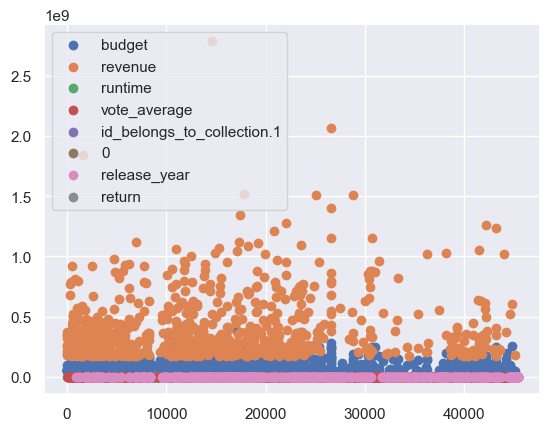

In [17]:
for column in outliers.columns:
    plt.scatter(outliers.index, outliers[column], label=column)
plt.legend()
plt.show()

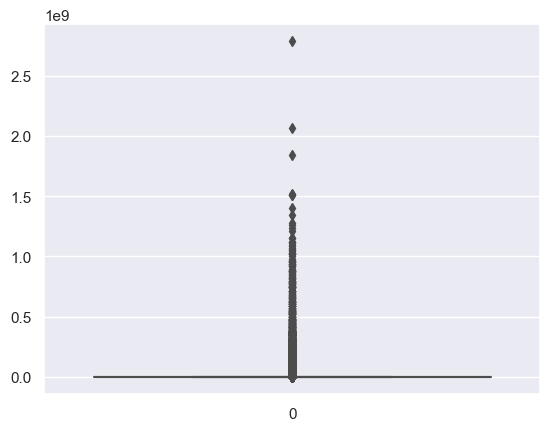

In [18]:
sns.boxplot(df.revenue)
plt.show()

<Axes: >

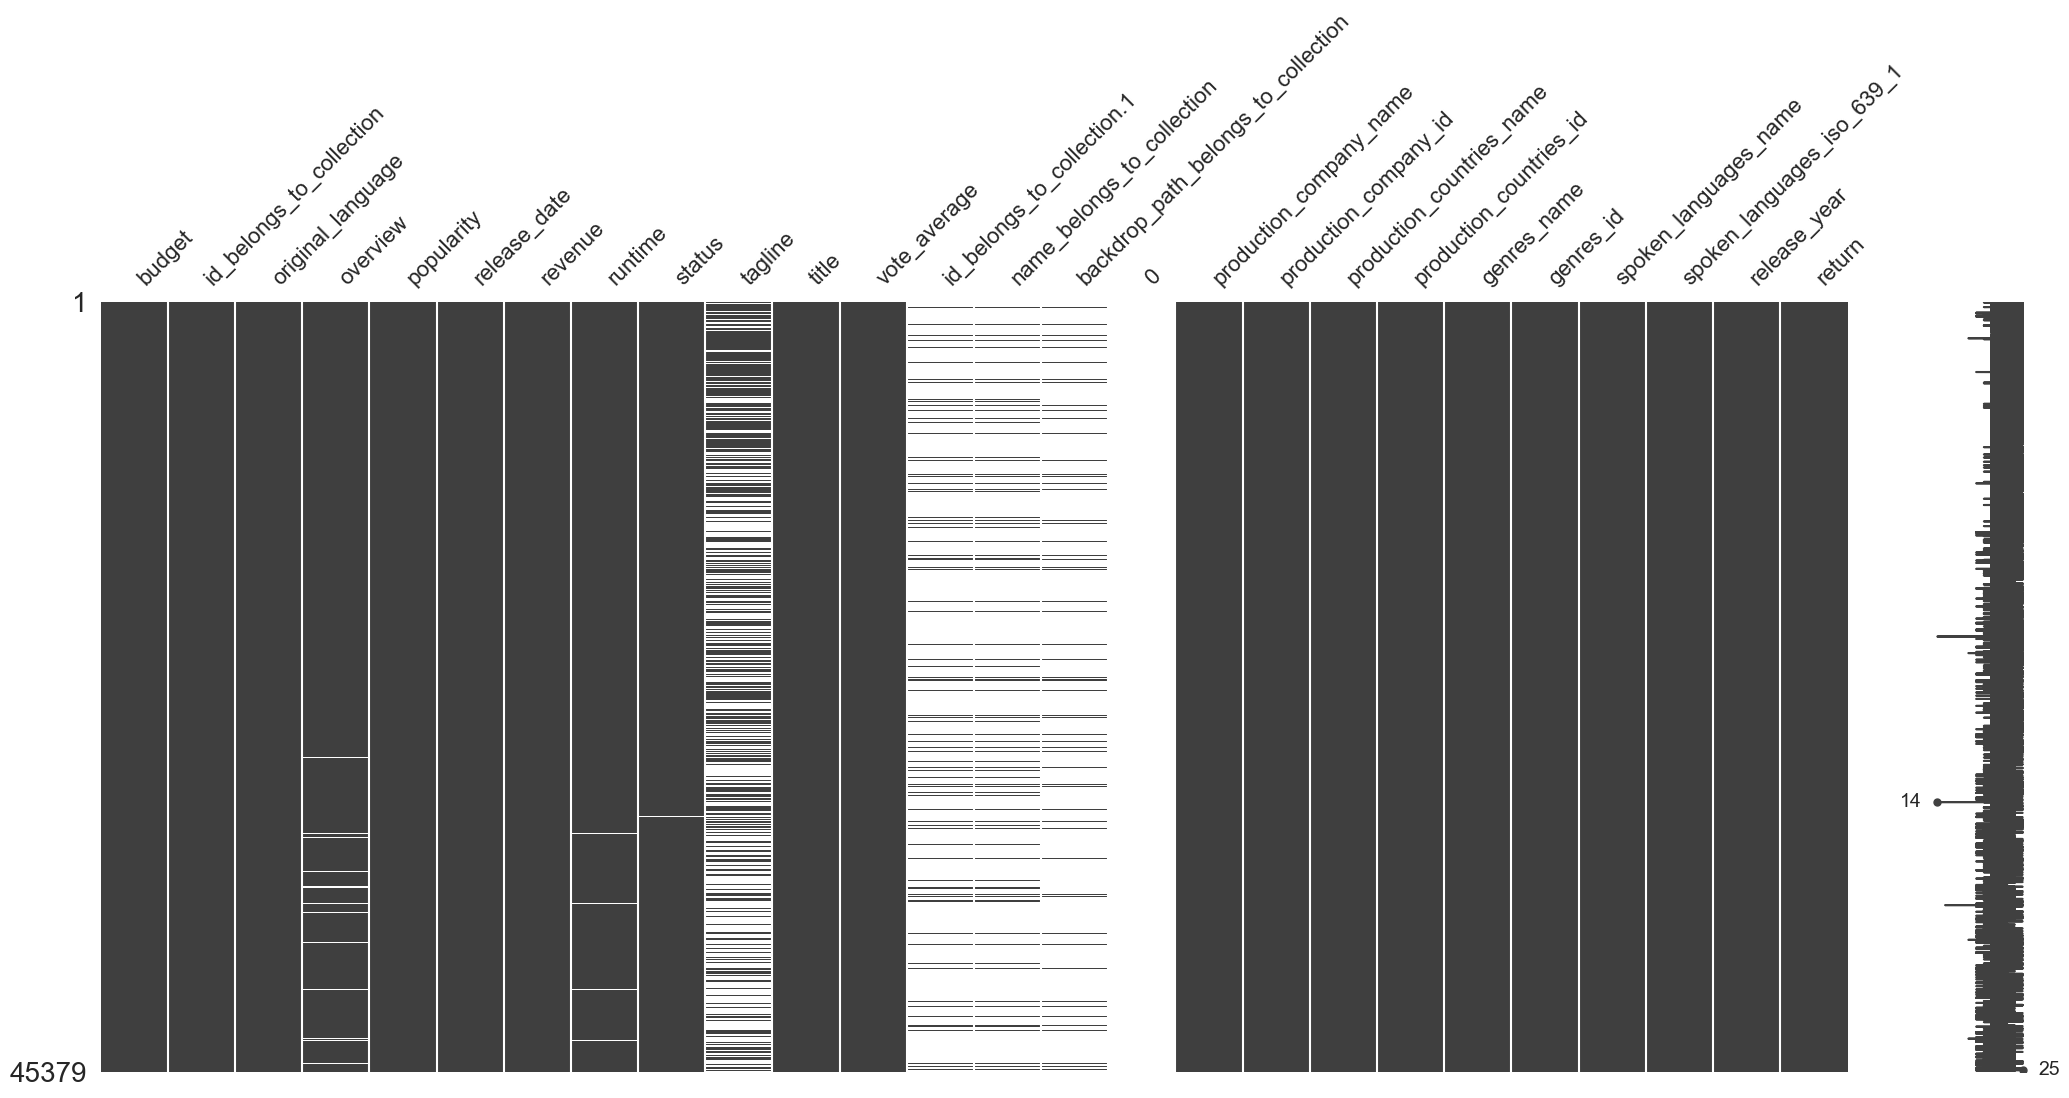

In [25]:
# Visualizar los valores faltantes con missingno
msno.matrix(df)


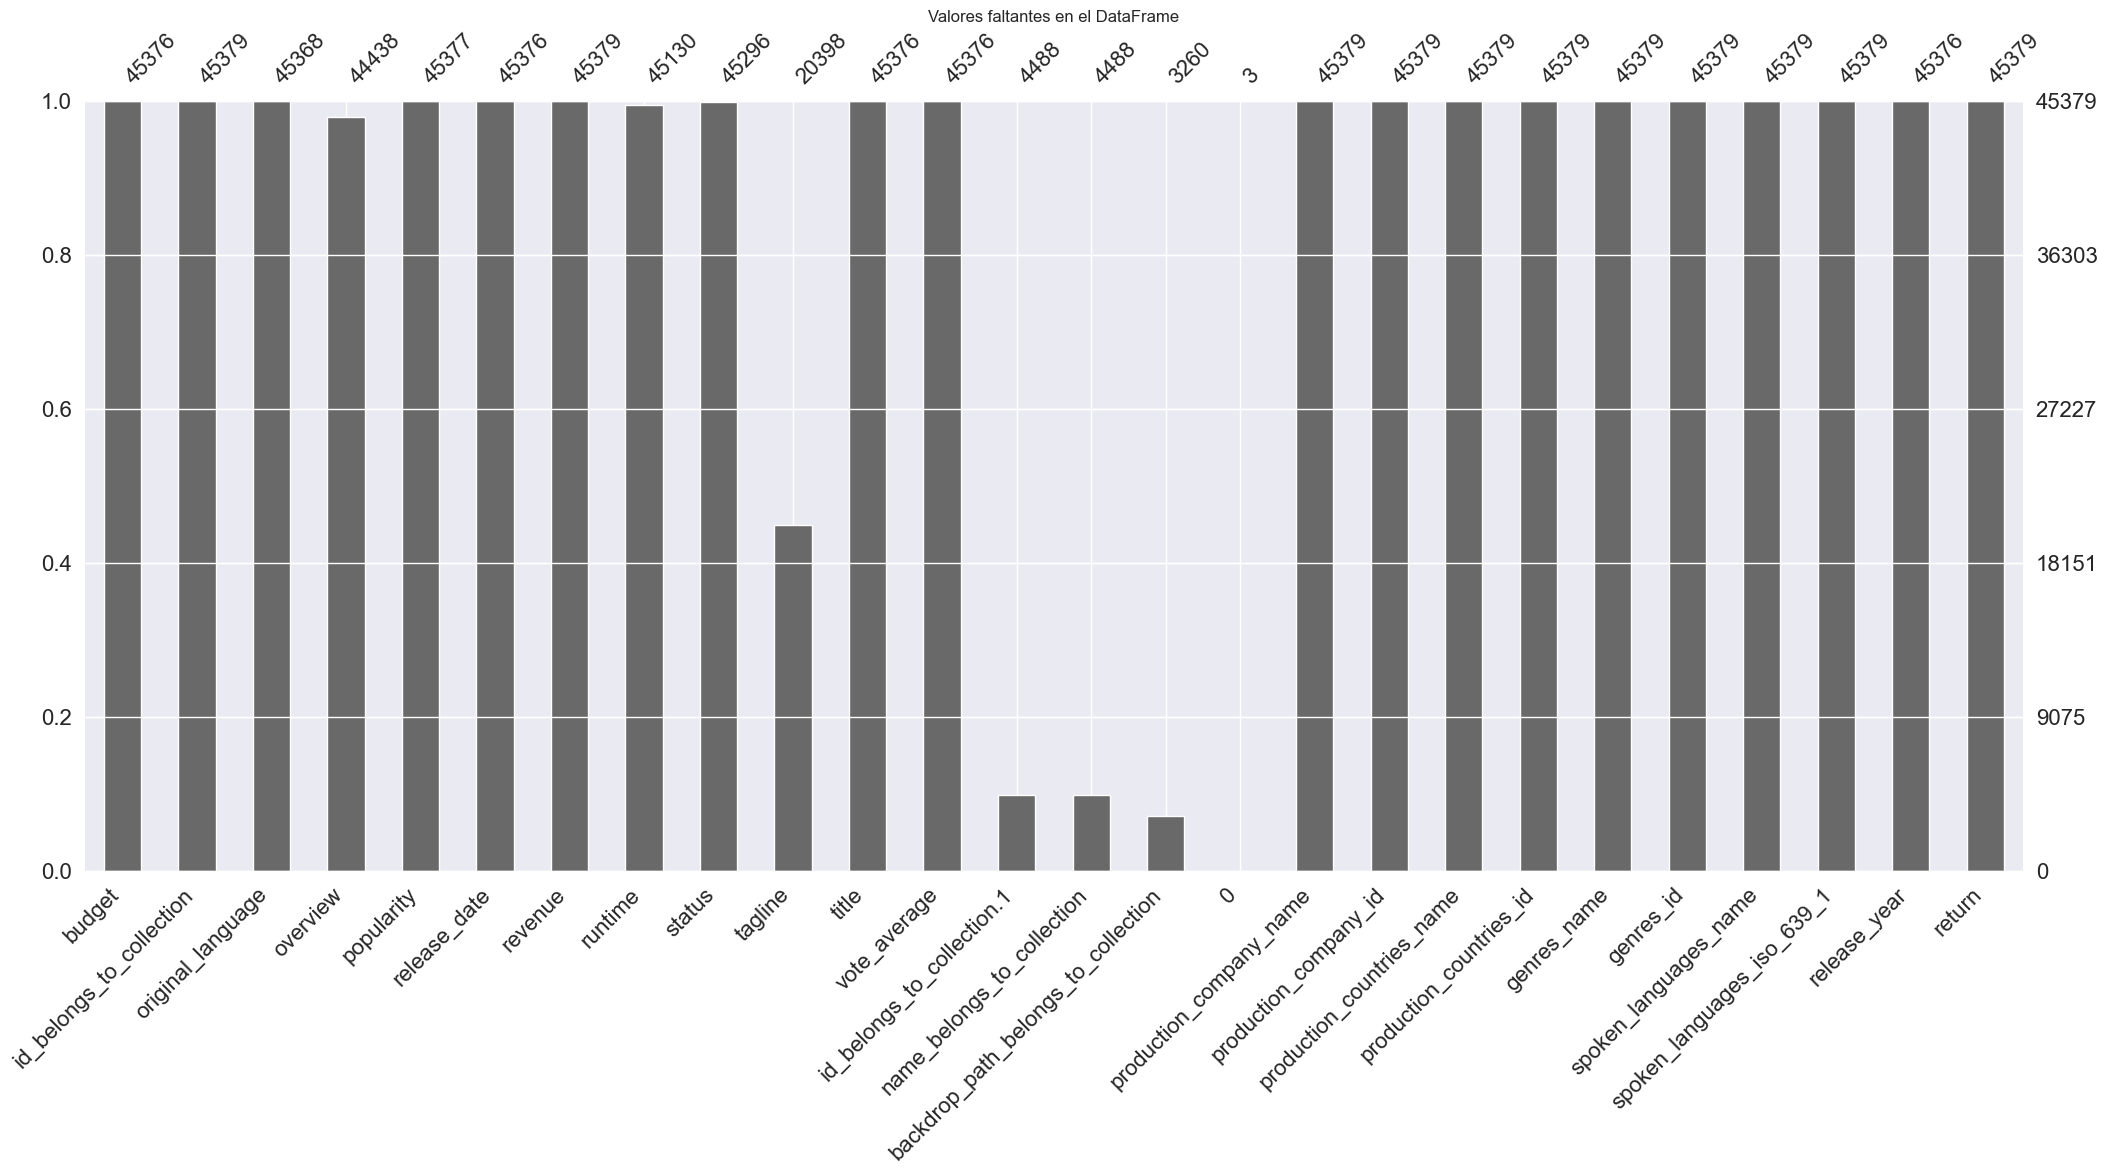

In [29]:
# Visualizar los valores faltantes con missingno
msno.bar(df)
plt.title('Valores faltantes en el DataFrame')
plt.show()


In [ ]:
# Crear el informe Sweetviz
report = sv.analyze(df, target_feat='revenue')

# Generar el informe HTML
report.show_html('informe.html')